In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from Data_Reader import MnistDataloader, show_result
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from os.path import join

input_path = "input"
training_images_filepath = join(
    input_path, "train-images-idx3-ubyte/train-images.idx3-ubyte"
)
training_labels_filepath = join(
    input_path, "train-labels-idx1-ubyte/train-labels.idx1-ubyte"
)
test_images_filepath = join(input_path, "t10k-images-idx3-ubyte/t10k-images.idx3-ubyte")
test_labels_filepath = join(input_path, "t10k-labels-idx1-ubyte/t10k-labels.idx1-ubyte")

mnist_dataloader = MnistDataloader(
    training_images_filepath,
    training_labels_filepath,
    test_images_filepath,
    test_labels_filepath,
)
(x_train, y_train), (x_test, y_test) = mnist_dataloader.load_data()

x_train = np.array(x_train).reshape(-1, 28 * 28) / 255.0
x_test = np.array(x_test).reshape(-1, 28 * 28) / 255.0
y_train = np.array(y_train)
y_test = np.array(y_test)

In [6]:
train_data = pd.DataFrame(x_train, columns=[f'pixel{i}' for i in range(x_train.shape[1])])
train_data['label'] = y_train
X = x_train
y = y_train

print("Shape of X after separating features:", X.shape)
print("Shape of y after separating labels:", y.shape)

Shape of X after separating features: (60000, 784)
Shape of y after separating labels: (60000,)


In [7]:
svm_ovo = SVC(decision_function_shape='ovo')
svm_ovo.fit(x_train, y_train)

y_pred_ovo = svm_ovo.predict(x_test)
print("One-vs-One Accuracy:", accuracy_score(y_test, y_pred_ovo))

One-vs-One Accuracy: 0.9792


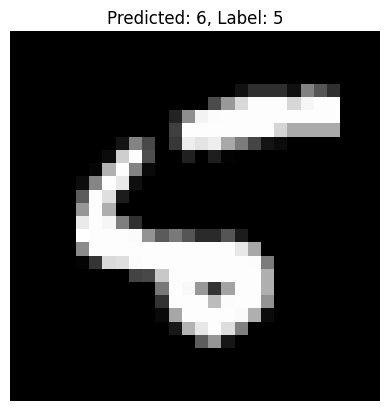

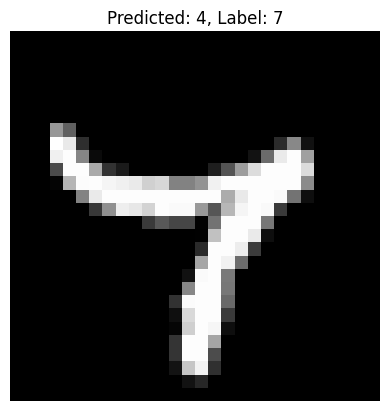

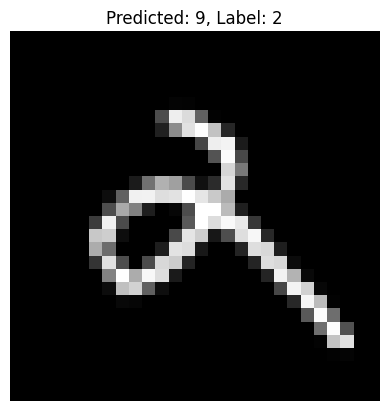

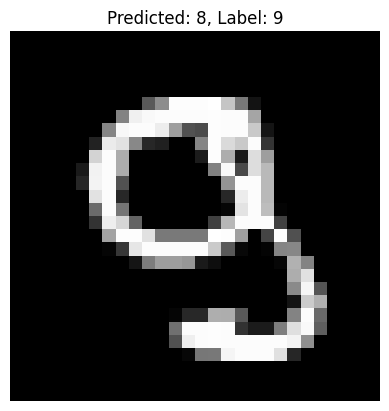

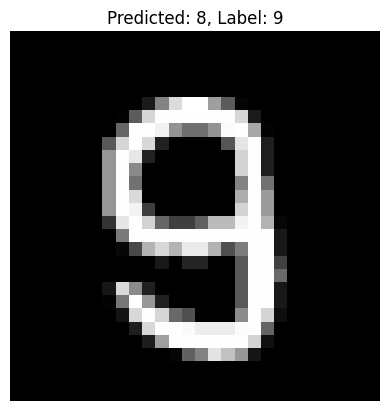

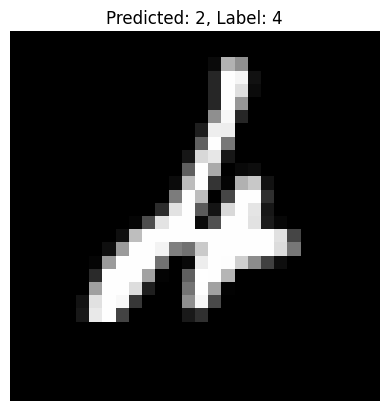

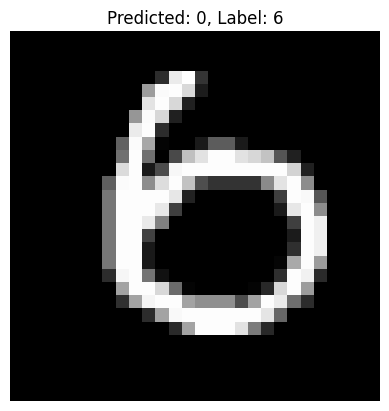

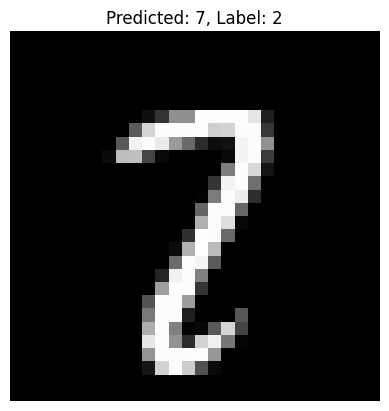

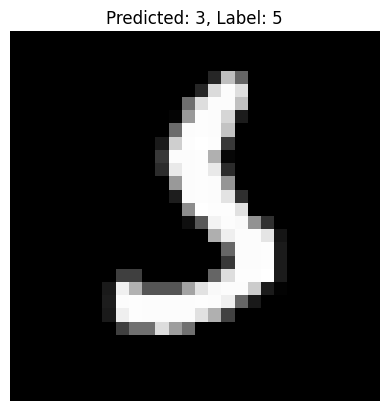

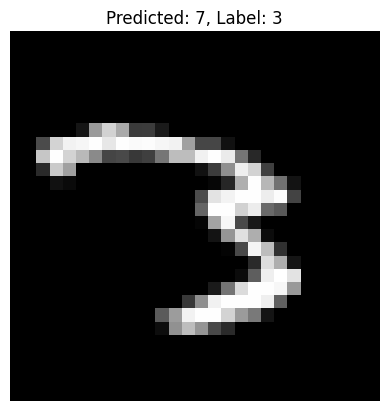

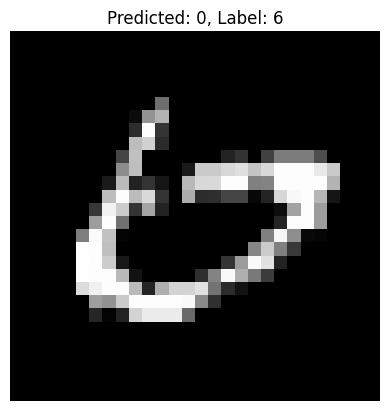

Number of wrong prediction: 208
Number of test sample: 10000


In [9]:
show_result(x_test, y_test, y_pred_ovo)